# Projeto - Cálculo

## Imports

In [176]:
%pip install latexify-py
%pip install ffmpeg-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\gabri\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\gabri\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [177]:
import latexify
import math

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import rc

## Código

### Criando o ambiente 3d e o espaço vetorial

In [178]:
@latexify.function
def F(r, theta):
    return np.array([r*math.cos(theta), r*math.sin(theta), r*math.sin(r)])

F

In [179]:
def normalize(F):
    return F / np.linalg.norm(F)

In [180]:
def setnorm(F, norm):
    return F * norm

C:\Users\gabri\AppData\Local\Temp/ipykernel_18428/4234996280.py:16: RuntimeWarning: invalid value encountered in arcsin
  ax.quiver(x, y, 0, *setnorm(normalize(F(r, np.arcsin(y/r))), 0.2))


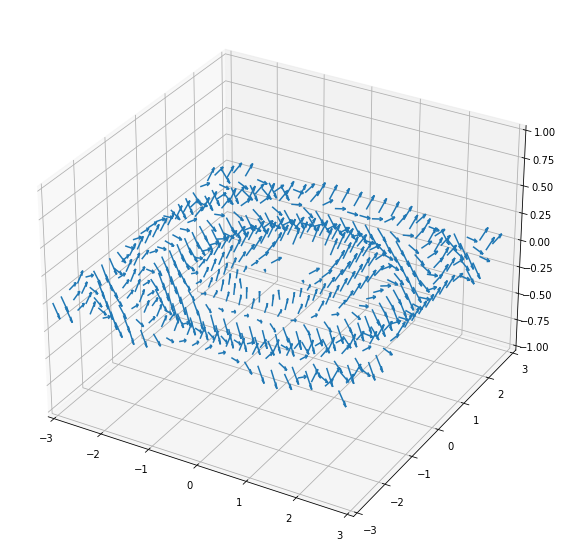

In [181]:
n = 23

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

xlow = -3
xhigh = 3
ylow = -3
yhigh = 3

for i in range(n):
    for j in range(n):
        x = xlow + (xhigh - xlow)/n*i
        y = ylow + (yhigh - ylow)/n*j
        r = x**2 + y**2
        ax.quiver(x, y, 0, *setnorm(normalize(F(r, np.arcsin(y/r))), 0.2))
ax.set_xlim([xlow, xhigh])
ax.set_ylim([ylow, yhigh])
ax.set_zlim([-1, 1])
plt.show()

C:\Users\gabri\AppData\Local\Temp/ipykernel_18428/94029154.py:20: RuntimeWarning: invalid value encountered in arcsin
  ax.quiver(x, y, z, *setnorm(normalize(F(r, np.arcsin(y/r))), 0.2))


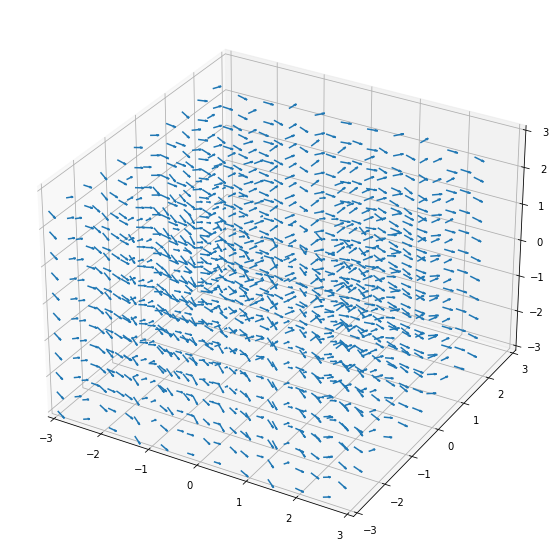

In [182]:
n = 11

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

xlow = -3
xhigh = 3
ylow = -3
yhigh = 3
zlow = -3
zhigh = 3

for i in range(n):
    for j in range(n):
        for k in range(n):
            x = xlow + (xhigh - xlow)/n*i
            y = ylow + (yhigh - ylow)/n*j
            z = zlow + (zhigh - zlow)/n*k
            r = x**2 + y**2
            ax.quiver(x, y, z, *setnorm(normalize(F(r, np.arcsin(y/r))), 0.2))
ax.set_xlim([xlow, xhigh])
ax.set_ylim([ylow, yhigh])
ax.set_zlim([zlow, zhigh])
plt.show()

## Adicionando partículas ao espaço vetorial

In [183]:
class Particle:
    def __init__(self, x, y, z):
        self.pos = np.array([x, y, z])
        self.vel = np.array([0, 0, 0])
        self.r = self.pos[0]**2 + self.pos[1]**2 + self.pos[2]**2
        self.acc = F(self.r, np.arcsin(self.pos[1]/self.r))
    
    def update(self):
        self.pos = self.pos + self.vel
        self.vel = self.vel + self.acc
        self.r = self.pos[0]**2 + self.pos[1]**2+ self.pos[2]**2
        print(np.arcsin(self.pos[1]/self.r))
        self.acc = F(self.r, np.arcsin(self.pos[1]/self.r))

In [184]:
# Crio 900 partículas uniformemente espaçadas em um espaço [-3, 3] x [-3, 3] (z = 0)

particles = []
n = 33

for i in range(n):
    for j in range(n):
        x = xlow + (xhigh - xlow)/n*i
        y = ylow + (yhigh - ylow)/n*j
        particles.append(Particle(x, y, 0))

C:\Users\gabri\AppData\Local\Temp/ipykernel_18428/3674626808.py:6: RuntimeWarning: invalid value encountered in arcsin
  self.acc = F(self.r, np.arcsin(self.pos[1]/self.r))


In [185]:
# Atualizo todas as partículas
def updateParticles(particles):
    for i in range(len(particles)):
        particles[i].update()

In [186]:
# Desenho um frame da animação
def drawParticles(n):
    updateParticles(particles)

    for particle in particles:
        ax.scatter(*particle.pos, c='black')
    ax.set_xlim([xlow, xhigh])
    ax.set_ylim([ylow, yhigh])
    ax.set_zlim([zlow, zhigh])
    
    return (ax,)

In [187]:
drawParticles(particles)

C:\Users\gabri\AppData\Local\Temp/ipykernel_18428/3674626808.py:12: RuntimeWarning: invalid value encountered in arcsin
  print(np.arcsin(self.pos[1]/self.r))
C:\Users\gabri\AppData\Local\Temp/ipykernel_18428/3674626808.py:13: RuntimeWarning: invalid value encountered in arcsin
  self.acc = F(self.r, np.arcsin(self.pos[1]/self.r))


-0.16744807921968932
-0.16711827211215546
-0.16604695264959488
-0.16410187373782123
-0.16113986351785234
-0.15701019695448656
-0.15155995879121054
-0.1446417510908438
-0.13612391912461558
-0.12590314044081494
-0.11391873249481894
-0.1001674211615598
-0.08471668234756896
-0.06771430161265142
-0.04939171349081655
-0.030059171283873504
-0.010091914423152257
0.010091914423152257
0.030059171283873552
0.04939171349081655
0.06771430161265148
0.08471668234756896
0.1001674211615598
0.11391873249481894
0.12590314044081494
0.1361239191246156
0.14464175109084382
0.15155995879121054
0.15701019695448656
0.16113986351785234
0.16410187373782126
0.1660469526495949
0.16711827211215546
-0.17801182834143156
-0.17836358192964308
-0.17796342004628177
-0.17665705614214838
-0.17427298592340656
-0.17062535643114238
-0.16551936701225595
-0.1587598730678149
-0.15016370779164642
-0.139575850885482
-0.1268889005424777
-0.1120643558454439
-0.09515311984080022
-0.07631166866119782
-0.05580990081968265
-0.03402718456

(<Axes3DSubplot:>,)

-0.013754309118672668
-0.011857586178425744
-0.025780682730055352
-0.019340796990117037
-0.013300630054881508
-0.019480396572765086
-0.03609664570810278
-0.025799472912516594
-0.016367603424254175
-0.014852961085524866
-0.017766257920351247
-0.024423451168608893
-0.0313635316670562
-0.03001993829992962
-0.021055077695276685
-0.011643108360653293
-0.003679847756219711
0.003679847756219711
0.011643108360653312
0.021055077695276685
0.03001993829992964
0.0313635316670562
0.024423451168608893
0.017766257920351247
0.014852961085524866
0.016367603424254182
0.025799472912516597
0.03609664570810278
0.019480396572765086
0.013300630054881508
0.019340796990117058
0.025780682730055324
0.011857586178425744
-0.01240422375731222
-0.027668768741194245
-0.01846865919412499
-0.014739375628439255
-0.027049959176217907
-0.03677283000001415
-0.02106596189506804
-0.017785745506053326
-0.02371593536940631
-0.04017900819806226
-0.04949478750498469
-0.0344641760698371
-0.021839711129677638
-0.014802841402575128

C:\Users\gabri\AppData\Local\Temp/ipykernel_18428/3674626808.py:12: RuntimeWarning: invalid value encountered in arcsin
  print(np.arcsin(self.pos[1]/self.r))
C:\Users\gabri\AppData\Local\Temp/ipykernel_18428/3674626808.py:13: RuntimeWarning: invalid value encountered in arcsin
  self.acc = F(self.r, np.arcsin(self.pos[1]/self.r))


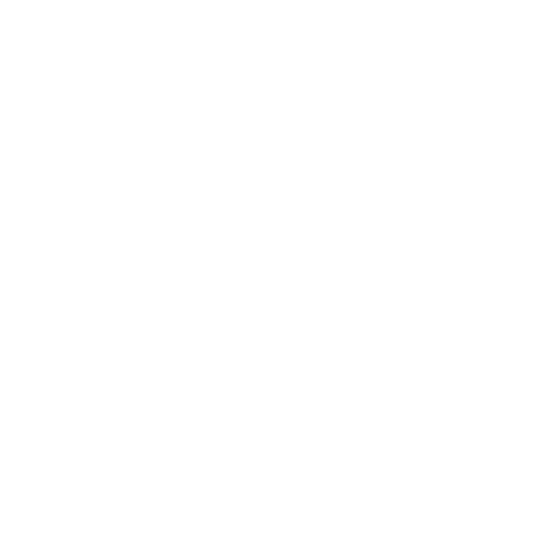

In [188]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
anim = animation.FuncAnimation(fig, drawParticles, frames=100, interval=20, blit=True)

In [189]:
rc('animation', html='html5')
anim

-0.0027822234186837243
-0.0024249116941715315
-0.004801669321356085
-0.003739332478833535
-0.0026707720048793184
-0.0037202170785503655
-0.006073694957717117
-0.004604655729411908
-0.0031125679792026067
-0.0028243178927281013
-0.003217257948943212
-0.003986991739710776
-0.004476420147481654
-0.003981480507249499
-0.002825366666186931
-0.0016169225204085774
-0.0005218668543891252
0.0005218668543891252
0.0016169225204085802
0.002825366666186931
0.003981480507249502
0.004476420147481654
0.003986991739710776
0.003217257948943212
0.0028243178927281013
0.0031125679792026076
0.0046046557294119085
0.006073694957717117
0.0037202170785503655
0.0026707720048793184
0.0037393324788335394
0.004801669321356081
0.0024249116941715315
-0.0025674908557262372
-0.005267933863419313
-0.0036836893216826245
-0.0029946330116974295
-0.005100826563990101
-0.006518198206586116
-0.004058842898962691
-0.003472254428112525
-0.004392980041244869
-0.006504469706435344
-0.00725286925967512
-0.005410125483983168
-0.0036

C:\Users\gabri\AppData\Local\Temp/ipykernel_18428/3674626808.py:12: RuntimeWarning: invalid value encountered in arcsin
  print(np.arcsin(self.pos[1]/self.r))
C:\Users\gabri\AppData\Local\Temp/ipykernel_18428/3674626808.py:13: RuntimeWarning: invalid value encountered in arcsin
  self.acc = F(self.r, np.arcsin(self.pos[1]/self.r))


-8.361207543096373e-05
-4.237656101335885e-05
-0.00024353638592145536
-0.00013546000476831804
-7.320763196201351e-05
-0.00012623287712262778
-0.00043959165871105985
-0.00031020121703284885
-0.0002095231966572342
-0.00015287185619799665
-0.0002435274997370119
-0.0004789907218770428
-0.0005997912562135247
-0.0005537614261952518
-0.00046152551226206383
-0.0002490220303388549
-8.332591014627794e-05
8.332591014627794e-05
0.0002490220303388553
0.00046152551226206383
0.0005537614261952521
0.0005997912562135247
0.0004789907218770428
0.0002435274997370119
0.00015287185619799665
0.00020952319665723426
0.00031020121703284885
0.00043959165871105985
0.00012623287712262778
7.320763196201351e-05
0.00013546000476829902
0.0002435363859214305
4.237656101335885e-05
-7.190400673486918e-05
-0.00026694316071928517
-0.00013861372219339322
-0.00011715246178173434
-0.00025559126414092116
-0.0005139474703305605
-0.00016255199952441726
-0.00016436166691014662
-0.00020185909176269947
-0.0005537708795751933
-0.001

C:\Users\gabri\AppData\Local\Temp/ipykernel_18428/3674626808.py:11: RuntimeWarning: overflow encountered in double_scalars
  self.r = self.pos[0]**2 + self.pos[1]**2+ self.pos[2]**2
C:\Users\gabri\AppData\Local\Temp/ipykernel_18428/1463064927.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([r*math.cos(theta), r*math.sin(theta), r*math.sin(r)])


ValueError: math domain error